# Explore here

In [7]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')




In [8]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)

In [9]:
artist_id = "4AbDWrmJPSOeIbT2Ou60ik"

# Get the top tracks of an artist
results = spotify.artist_top_tracks(artist_id)

songs = []
for track in results['tracks']:
    songs.append({
        'name': track['name'],
        'popularity': track['popularity'],
        'duration_min': track['duration_ms'] / 60000
    })

In [10]:
import pandas as pd
tracks_df = pd.DataFrame(songs)

print(tracks_df.head(5))

                 name  popularity  duration_min
0  Roses for the Dead          52      4.123767
1              Juneau          42      3.628217
2  Rookie Of The Year          41      3.006433
3           Streetcar          48      3.614883
4             History          47      4.159100


In [11]:
songs=[]
popularity=[]
duration=[]

for track in results['tracks'][:10]:
    print('track    : ' + track['name'])
    songs.append(track['name'])
    popularity.append(track['popularity'])
    duration.append(track['duration_ms']/(1000*60)%60)

track    : Roses for the Dead
track    : Juneau
track    : Rookie Of The Year
track    : Streetcar
track    : History
track    : All the Rage
track    : Into Oblivion (Reunion)
track    : Escape Artists Never Die
track    : Red Is The New Black
track    : Recovery


In [12]:
df = pd.DataFrame()

df['songs'] = songs
df['popularity'] = popularity
df['duration'] = duration

In [13]:
df

,songs,popularity,duration
0,Roses for the Dead,52,4.123767
1,Juneau,42,3.628217
2,Rookie Of The Year,41,3.006433
3,Streetcar,48,3.614883
4,History,47,4.159100
5,All the Rage,26,3.628667
6,Into Oblivion (Reunion),25,4.382000
7,Escape Artists Never Die,29,5.300000
8,Red Is The New Black,28,5.241767
9,Recovery,29,3.510217


In [ ]:
df_ascendente = df.sort_values(by='popularity', ascending=False)
df_ascendente

,songs,popularity,duration
0,Roses for the Dead,52,4.123767
3,Streetcar,48,3.614883
4,History,47,4.159100
1,Juneau,42,3.628217
2,Rookie Of The Year,41,3.006433
7,Escape Artists Never Die,29,5.300000
9,Recovery,29,3.510217
8,Red Is The New Black,28,5.241767
5,All the Rage,26,3.628667
6,Into Oblivion (Reunion),25,4.382000


In [ ]:
df_ascendente.head(5)

,songs,popularity,duration
0,Roses for the Dead,52,4.123767
3,Streetcar,48,3.614883
4,History,47,4.159100
1,Juneau,42,3.628217
2,Rookie Of The Year,41,3.006433


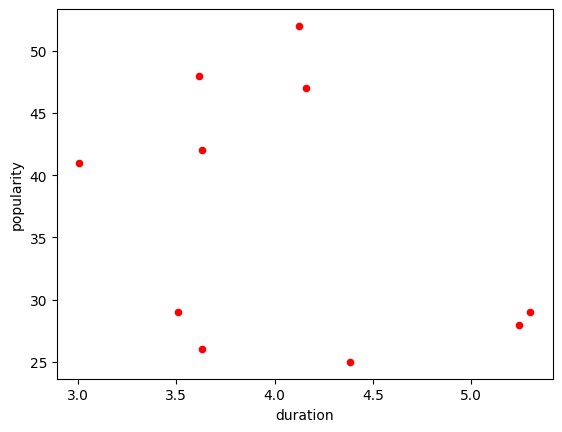

In [27]:
Popularity_duration_tracks = df.plot.scatter(x='duration',
                      y='popularity',
                      c='Red'
                      )

Podemos ver que las canciones mas populares estan entre los 3.5 minutos a 4, pero no es una fuerte relacion, mientras que las canciones mas largas no tienen tanta popularidad.

In [20]:
import sqlite3
connection = sqlite3.connect("SpotifyTracks.db")
connection

In [21]:
cursor = connection.cursor()
cursor.execute("""CREATE TABLE MisCancionesSpotify (songs, popularity, duration)""")

In [22]:
CancionesSpotify = list(df_ascending.to_records(index = False))
CancionesSpotify[:5]

[np.record(('Roses for the Dead', 52, 4.123766666666667), dtype=[('songs', 'O'), ('popularity', '<i8'), ('duration', '<f8')]),
 np.record(('Streetcar', 48, 3.6148833333333332), dtype=[('songs', 'O'), ('popularity', '<i8'), ('duration', '<f8')]),
 np.record(('History', 47, 4.1591), dtype=[('songs', 'O'), ('popularity', '<i8'), ('duration', '<f8')]),
 np.record(('Juneau', 42, 3.628216666666667), dtype=[('songs', 'O'), ('popularity', '<i8'), ('duration', '<f8')]),
 np.record(('Rookie Of The Year', 41, 3.0064333333333333), dtype=[('songs', 'O'), ('popularity', '<i8'), ('duration', '<f8')])]

In [24]:
cursor.executemany("INSERT INTO MisCancionesSpotify VALUES (?,?,?)", CancionesSpotify)
connection.commit()